In [1]:
import itertools
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 10
warnings.filterwarnings('ignore')

In [3]:
file_path = '../Data/VALE3.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.head()

,ds,y
0,2009-03-31,17.85
1,2009-06-30,20.17
2,2009-09-30,9.92
3,2009-12-31,10.71
4,2010-03-31,9.98


In [6]:
validation_size = 2

training_df = df.head(len(df) - validation_size)
training_df.head()

,ds,y
0,2009-03-31,17.85
1,2009-06-30,20.17
2,2009-09-30,9.92
3,2009-12-31,10.71
4,2010-03-31,9.98


In [7]:
validation_df = df.tail(validation_size)
validation_df.set_index(pd.to_datetime(validation_df.ds, format="%Y-%m-%d"), drop=True, inplace=True)
validation_df.drop('ds', axis=1, inplace=True)
validation_df.head()

,y
ds,
2023-03-31,43.44
2023-06-30,30.45


In [8]:
training_df.set_index(pd.to_datetime(training_df.ds, format="%Y-%m-%d"), drop=True, inplace=True)
training_df.drop('ds', axis=1, inplace=True)

training_df.head()

,y
ds,
2009-03-31,17.85
2009-06-30,20.17
2009-09-30,9.92
2009-12-31,10.71
2010-03-31,9.98


In [9]:
training_df.shape

(56, 1)

In [10]:
training_df = training_df.sort_index()

In [11]:
training_df.describe()

,y
count,56.000000
mean,13.521964
std,20.812375
min,-33.710000
25%,2.632500
50%,9.990000
75%,20.700000
max,63.770000


In [12]:
training_df['Ticks'] = range(0,len(training_df.index.values))

In [13]:
training_df.head(10)

,y,Ticks
ds,,
2009-03-31,17.85,0
2009-06-30,20.17,1
2009-09-30,9.92,2
2009-12-31,10.71,3
2010-03-31,9.98,4
2010-06-30,14.34,5
2010-09-30,19.87,6
2010-12-31,26.82,7
2011-03-31,31.36,8


In [14]:
training_df.tail(10)

,y,Ticks
ds,,
2020-09-30,7.95,46
2020-12-31,14.38,47
2021-03-31,27.13,48
2021-06-30,43.71,49
2021-09-30,52.78,50
2021-12-31,63.01,51
2022-03-31,63.77,52
2022-06-30,55.74,53
2022-09-30,59.45,54


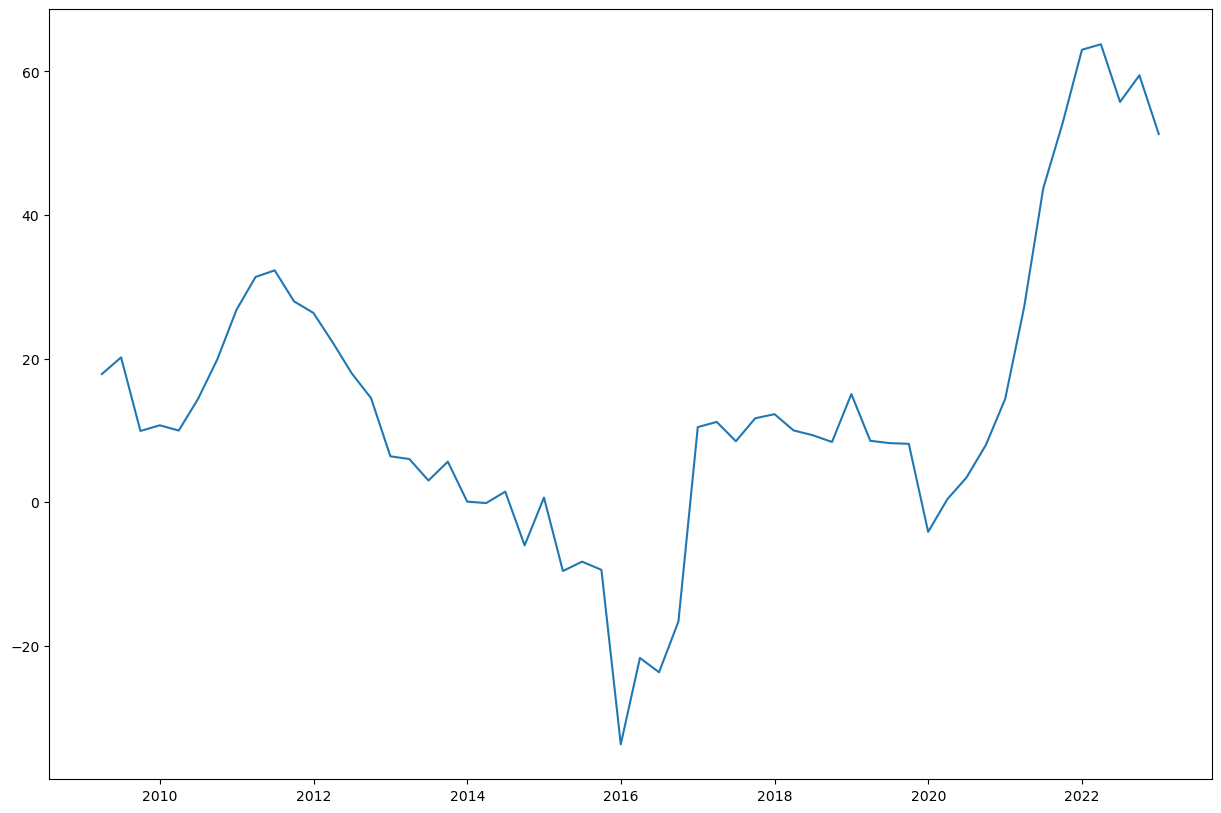

In [15]:
plt.plot(training_df.y)

In [16]:
def stationarity_check(ts):
    # Média móvel
    roll_mean = ts.rolling(12).mean()
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Média móvel')
    plt.legend(loc='best')
    plt.title('Média móvel')
    plt.show(block=False)
    # (ADF)Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags','Número de observações'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

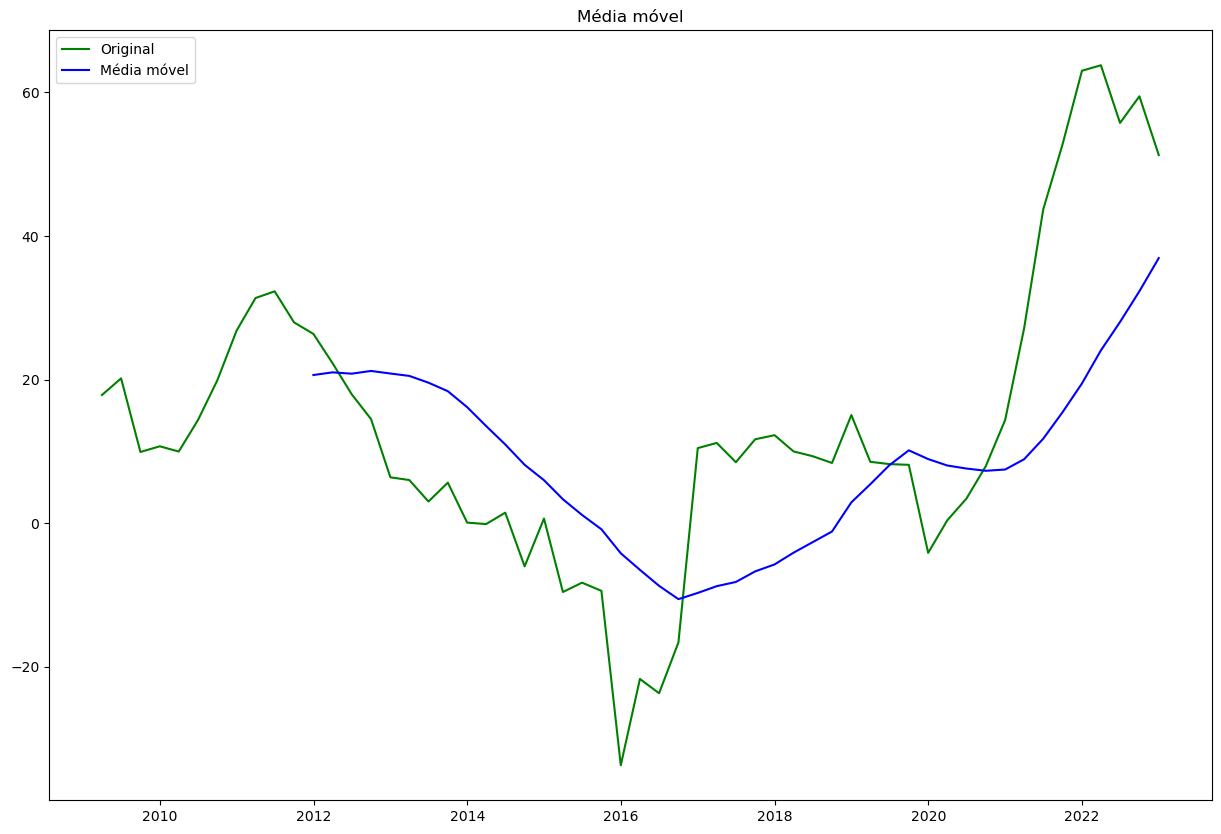

Augmented Dickey-Fuller test:
df_output: 
 Test Statistic           -0.954107
p-value                   0.769633
#Lags                     4.000000
Número de observações    51.000000
dtype: float64
Test Statistic           -0.954107
p-value                   0.769633
#Lags                     4.000000
Número de observações    51.000000
Critical Value (1%)      -3.565624
Critical Value (5%)      -2.920142
Critical Value (10%)     -2.598015
dtype: float64


In [17]:
stationarity_check(training_df.y)

In [18]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [19]:
stepwise_fit = auto_arima(training_df['y'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=388.983, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=501.893, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=393.985, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=519.915, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=388.801, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=427.293, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=395.303, Time=0.01 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=389.045, Time=0.01 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 0.290 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -189.400
Date:                Wed, 08 Nov 2023   AIC                            388.801
Time:                        23:44:06   BIC                            398.928
Sample:                    03-31-2009   HQIC                           392.727
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2061      1.703      1.295      0.195      -1.132       5.544
ar.L1          0.8843      0.076     11.659      0.000       0.736       1.033
ma.L1         -0.0689      0.193     -0.358      0.720      -0.446       0.308
ma.L2          0.6121      0.081      7.523      0.000       0.453       0.772
sigma2        47.9391      6.705      7.150      0.000      34.797      61.081
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):                17.19
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               3.64   Skew:                            -0.45
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

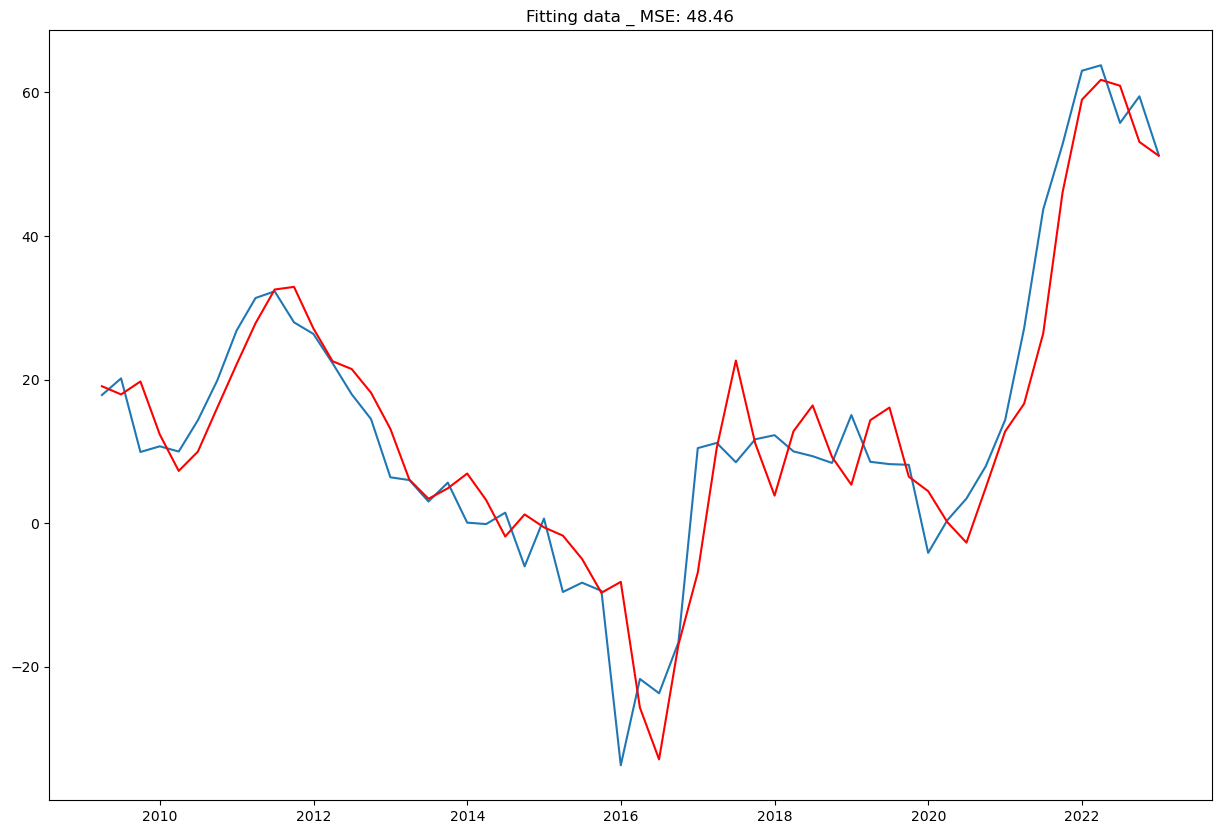

In [20]:
model = sm.tsa.arima.ARIMA(training_df.y, order=(1,0,2))  
results = model.fit()  
plt.plot(training_df.y)
plt.plot(results.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results.fittedvalues-training_df.y)**2).mean()))
plt.show()

In [21]:
predictions = results.predict('2009-03-31', '2023-06-30')

In [22]:
predictions.tail()

2022-06-30    60.922699
2022-09-30    53.096184
2022-12-31    51.168156
2023-03-31    51.427026
2023-06-30    47.746058
Freq: Q-DEC, Name: predicted_mean, dtype: float64

<Axes: xlabel='ds'>

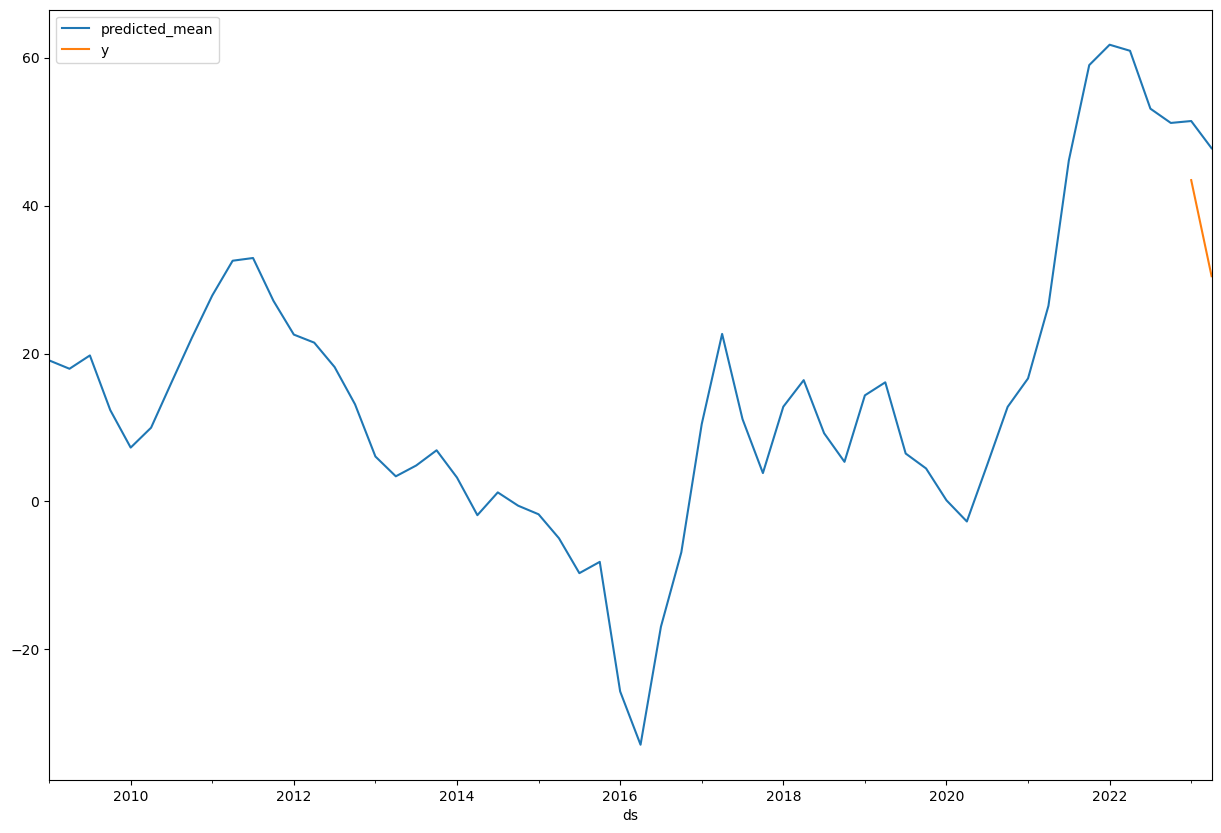

In [23]:
predictions.plot(legend=True)
validation_df['y'].plot(legend=True)

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print("Trimestres peditos para validação: \n", predictions.tail(len(validation_df)))
print("Conjunto para validação: \n", validation_df)
rmse=sqrt(mean_squared_error(predictions.tail(len(validation_df)), validation_df['y']))
print("RMSE: ", rmse)

Trimestres peditos para validação: 
 2023-03-31    51.427026
2023-06-30    47.746058
Freq: Q-DEC, Name: predicted_mean, dtype: float64
Conjunto para validação: 
                 y
ds               
2023-03-31  43.44
2023-06-30  30.45
RMSE:  13.47119554829159
